In [64]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = Variable(torch.ones(2,2), requires_grad = True)
a

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [3]:
torch.ones(2,2) 

tensor([[1., 1.],
        [1., 1.]])

In [6]:
b = Variable(torch.ones(2,2), requires_grad = True)
print(a + b)
print(torch.add(a,b))

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)


In [8]:
print(a*b)
print(torch.mul(a,b))

tensor([[1., 1.],
        [1., 1.]], grad_fn=<MulBackward0>)
tensor([[1., 1.],
        [1., 1.]], grad_fn=<MulBackward0>)


In [32]:
x = Variable(torch.ones(2), requires_grad = True)

In [33]:
y = 5 * (x + 1)**2
y

tensor([20., 20.], grad_fn=<MulBackward0>)

In [34]:
o = (1/2) * torch.sum(y)
o

tensor(20., grad_fn=<MulBackward0>)

In [35]:
o.backward(retain_graph=True)

In [36]:
x.grad

tensor([10., 10.])

In [61]:
o.backward(torch.FloatTensor([1.0,1.0]), retain_graph=True)
x.grad

tensor([70., 70.])

## Linear Regression

In [74]:
x_values = [i for i in range(10)]

In [75]:
x_train = np.array(x_values, dtype = np.float32)

In [76]:
x_train = x_train.reshape(-1,1)
x_train.shape

(10, 1)

In [77]:
y_values = [2*i + 1 for i in x_values]

In [78]:
y_train = np.array(y_values, dtype = np.float32)

In [79]:
y_train = y_train.reshape(-1,1)
y_train.shape

(10, 1)

In [80]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [81]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

if torch.cuda.is_available():
    model.cuda()

In [82]:
criterion = nn.MSELoss()

In [83]:
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [84]:
epochs = 100
for e in range(epochs):
    e+=1
    
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    print("epoch: {} loss: {}".format(e,loss.data))

epoch: 1 loss: 72.83328247070312
epoch: 2 loss: 12.827836036682129
epoch: 3 loss: 2.4583799839019775
epoch: 4 loss: 0.6641968488693237
epoch: 5 loss: 0.3515324592590332
epoch: 6 loss: 0.2948487102985382
epoch: 7 loss: 0.28241923451423645
epoch: 8 loss: 0.27766475081443787
epoch: 9 loss: 0.27426549792289734
epoch: 10 loss: 0.2711295485496521
epoch: 11 loss: 0.26806798577308655
epoch: 12 loss: 0.2650472819805145
epoch: 13 loss: 0.2620619237422943
epoch: 14 loss: 0.25911054015159607
epoch: 15 loss: 0.2561919391155243
epoch: 16 loss: 0.2533067464828491
epoch: 17 loss: 0.2504536807537079
epoch: 18 loss: 0.24763308465480804
epoch: 19 loss: 0.2448439747095108
epoch: 20 loss: 0.2420864850282669
epoch: 21 loss: 0.23935984075069427
epoch: 22 loss: 0.23666401207447052
epoch: 23 loss: 0.23399856686592102
epoch: 24 loss: 0.23136329650878906
epoch: 25 loss: 0.22875738143920898
epoch: 26 loss: 0.2261810004711151
epoch: 27 loss: 0.22363346815109253
epoch: 28 loss: 0.2211148887872696
epoch: 29 loss: 0.

In [85]:
pred = model(Variable(torch.from_numpy(x_train))).data.numpy()
pred

array([[ 0.42203  ],
       [ 2.5142016],
       [ 4.6063733],
       [ 6.698545 ],
       [ 8.790717 ],
       [10.882889 ],
       [12.97506  ],
       [15.067232 ],
       [17.159403 ],
       [19.251574 ]], dtype=float32)

In [86]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.]], dtype=float32)

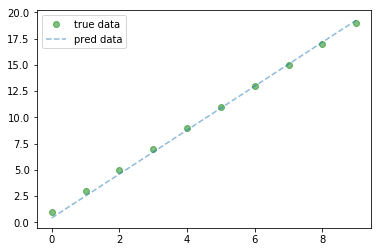

In [87]:
plt.clf()

plt.plot(x_train, y_train, 'go', label = 'true data', alpha = 0.5)
plt.plot(x_train, pred, '--', label = 'pred data', alpha = 0.5)

plt.legend(loc='best')
plt.show()

In [68]:
save_model = False
if save_model:
    torch.save(model.state_dict(), 'lin_reg_model.pkl')

In [69]:
load_model = False
if load_model:
    model.load_state_dict(torch.load('lin_reg_model.pkl'))